**<b><font color="red">ch12. 데이터프레임과 시리즈(Pandas)</font><b>**

## 1절. 판다스 패키지

- 1차원 구조를 갖는 시리즈, 2차원 구조를 갖는 데이터프레임 제공.<br>
- 결측치처리, 크기변경(열 삽입, 열 삭제, 원하는 부분만 슬라이싱), <br>
  데이터분할 하거나 병합,구조변경, 데이터정렬, 파일입출력 등이 용이하다.<br>
  
- 다양한 정보 제공 사이트.<br>  
- https://pypi.python.org/pypi/pandas (package index)
- https://pandas.pydata.org/pandas-docs/stable/api.html (API reference)

In [1]:
%ls data

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 9C7A-1AB6

 C:\Users\V3RITaS\Desktop\WDS\src\8_Python\data 디렉터리

2021-03-03  오후 08:43    <DIR>          .
2021-03-03  오후 08:43    <DIR>          ..
2021-02-26  오후 03:02                44 ch08.abc.txt
2021-03-02  오후 10:07                80 ch09.customer.csv
2021-03-02  오후 10:00                86 ch09.customers.csv
2021-03-02  오후 10:07                49 ch09.customers.txt
2021-03-02  오후 01:20           292,544 ch09.iris.hdf5
2021-03-02  오후 02:45         1,069,192 ch09.iris2.hdf5
2021-02-26  오후 06:19               230 ch09.member.data
2021-02-26  오후 06:12               112 ch09.member.txt
2021-03-02  오전 10:08               162 ch09.member1.csv
2021-03-02  오후 12:15               192 ch09.member1.json
2021-03-02  오전 11:05                92 ch09.member1-1.csv
2021-03-02  오전 10:16                68 ch09.member2.csv
2021-03-02  오후 12:36               279 ch09.member2.json
2021-03-02  오전 10:22                70 ch09.member2-1.csv
2021-03-02  오전 11:21          

In [2]:
# pd.read_json? => 에 대한 설명.
import pandas as pd
data = pd.read_json("data/ch09.member2.json", encoding="utf8")
data

,name,age,email,address
0,홍길동,20,hong@hong.com,서울
1,김길동,25,kim@hong.com,파주
2,윤길동,25,yun@hong.com,인천


In [3]:
type(data) #data 의 타입은? => pandas.core.frame.DataFrame

pandas.core.frame.DataFrame

# 2절. 데이터프레임 생성.

## 2.1 딕셔너리를 이용한 데이터프레임 생성.

In [7]:
import pandas as pd
d = {'col1' : [1,2], 'col2' : [3,4]} # 각각 데이터갯수가 다르면 불가, 리스트형식이 아니여도 불가.
df = pd.DataFrame(data = d)
df

,col1,col2
0,1,3
1,2,4


In [9]:
d = [{'col1' : 1, 'col2' : 3},{'col1' : 2, 'col2' : 4}]
df = pd.DataFrame(data = d)
df

,col1,col2
0,1,3
1,2,4


In [11]:
# 실수를 했을때, 들어가긴하나 결측치로.
d = [{'col1' : 1, 'col2' : 3},{'col1' : 2, 'col2' : 4},{'col' : 9}]
df = pd.DataFrame(data = d)
df

,col1,col2,col
0,1.0,3.0,NaN
1,2.0,4.0,NaN
2,NaN,NaN,9.0


## 2.2리스트를 이용하여 데이터프레임 생성.

In [12]:
kor = [100,95,94,92,90]
math = [90,95,82,73,60]
df = pd.DataFrame({'kor':kor, 'math':math})
df

,kor,math
0,100,90
1,95,95
2,94,82
3,92,73
4,90,60


In [19]:
import numpy as np
df = pd.DataFrame(np.c_[kor,math], columns=['kor','math']) 
df # columns=['kor','math'] 컬럼명 지정. (대부분 행이름을 지정해주지는 않는다.)

,kor,math
0,100,90
1,95,95
2,94,82
3,92,73
4,90,60


In [21]:
np.c_[kor,math] # 세로로 출력.

array([[100,  90],
       [ 95,  95],
       [ 94,  82],
       [ 92,  73],
       [ 90,  60]])

In [24]:
np.c_[[kor],[math]] # 2차원으로. 가로로 출력.

array([[100,  95,  94,  92,  90,  90,  95,  82,  73,  60]])

In [25]:
pd.DataFrame(np.c_[[kor],[math]], 
                columns = ['score1','score2','score3','score4','score5','score6',
                           'score7','score8','score9','score10'])

,score1,score2,score3,score4,score5,score6,score7,score8,score9,score10
0,100,95,94,92,90,90,95,82,73,60


## 2.3 read_csv()

In [132]:
df = pd.read_csv('E:/WDS/BigDataUI/data/src/08.Python/data/상가업소정보_201912_01.csv',
                 sep='|', encoding="utf-8")
df.head(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19905471,와라와라호프,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,기타 주점업,11,서울특별시,11680,강남구,1168060000,대치1동,1168010600,대치동,1168010600206040000,1,대지,604,NaN,서울특별시 강남구 대치동 604,116802000003,서울특별시 강남구 남부순환로,2933,NaN,1168010600106040000014378,대치상가,서울특별시 강남구 남부순환로 2933,135280,6280.0,NaN,1,NaN,127.061026,37.493922


In [133]:
pd.options.display.max_columns # 최대로 출력할 수 있는 컬럼수

39

In [134]:
pd.options.display.max_columns = 39 #3최대 39열까지 출력 하겠다.
df.head(3)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19905471,와라와라호프,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,기타 주점업,11,서울특별시,11680,강남구,1168060000,대치1동,1168010600,대치동,1168010600206040000,1,대지,604,NaN,서울특별시 강남구 대치동 604,116802000003,서울특별시 강남구 남부순환로,2933,NaN,1168010600106040000014378,대치상가,서울특별시 강남구 남부순환로 2933,135280,6280.0,NaN,1,NaN,127.061026,37.493922
1,19911397,커피빈코리아선릉로93길점,코리아선릉로93길점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,비알콜 음료점업,11,서울특별시,11680,강남구,1168064000,역삼1동,1168010100,역삼동,1168010100206960042,1,대지,696,42.0,서울특별시 강남구 역삼동 696-42,116804166502,서울특별시 강남구 선릉로93길,6,NaN,1168010100106960042022041,NaN,서울특별시 강남구 선릉로93길 6,135080,6149.0,NaN,1,NaN,127.047883,37.505675
2,19911801,프로포즈,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,기타 주점업,11,서울특별시,11545,금천구,1154563000,독산3동,1154510200,독산동,1154510200201620001,1,대지,162,1.0,서울특별시 금천구 독산동 162-1,115453117003,서울특별시 금천구 가산로,34,6.0,1154510200101620001017748,NaN,서울특별시 금천구 가산로 34-6,153010,8545.0,NaN,1,NaN,126.899220,37.471711


In [135]:
# (1) csv파일로 읽어오기 sep=',' 기본값이라 생략 가능.
member_df = pd.read_csv('data/ch12.member.data.csv',sep=',',encoding='utf-8')

member_df

,Name,Age,Email,Address
0,홍길동,20,kildong@hong.com,서울시 강동구
1,홍길서,20,kilseo@hong.com,서울시 강서구
2,홍길남,20,south@hong.com,서울시 강남구
3,홍길북,20,north@hong.com,서울시 강북구
4,#횽낄똥,26,kil@hong,서울시 마포구


In [44]:
# 2) 주석행 지정
member_df = pd.read_csv('data/ch12.member.data.csv',sep=',',encoding='utf-8',
                        comment='#') #comment='#'  => '' 안에 는 읽지마라.
member_df

,Name,Age,Email,Address
0,홍길동,20,kildong@hong.com,서울시 강동구
1,홍길서,20,kilseo@hong.com,서울시 강서구
2,홍길남,20,south@hong.com,서울시 강남구
3,홍길북,20,north@hong.com,서울시 강북구


In [39]:
type(member_df) # 2차원 : DataFrame

pandas.core.frame.DataFrame

In [41]:
type(member_df['Name']) #1차원 : Series

pandas.core.series.Series

In [47]:
# 특정 행 제외 해서 읽어오기. 0번째는 헤더.
member_df = pd.read_csv('data/ch12.member.data.csv',comment = '#', skiprows=[1,3])
member_df

,Name,Age,Email,Address
0,홍길서,20,kilseo@hong.com,서울시 강서구
1,홍길북,20,north@hong.com,서울시 강북구


## 2.4 sklearn.datasets 모듈 데이터를 데이터프레임으로 변환하기
- sklearn 패키지에는 학습을 위한 많은 데이터셋 제공. (딕셔너리 형태로 제공)

In [48]:
from sklearn import datasets
import pandas as pd
import numpy as np

In [49]:
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [53]:
iris["feature_names"] #독립변수 컬럼명.
iris.feature_names #위 아래 둘다 가능. (특수문자나, 한글인 경우 상단의 문법으로만 가능.)

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [56]:
iris["data"] #독립변수
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [58]:
iris['target'] #원핫인코딩 이 된 종속변수
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [61]:
iris['target_names']
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [63]:
#사람이 알아보기 쉬운 원핫인코딩 안된, 종속변수
iris.target_names[iris.target]
iris['target_names'][iris['target']]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [65]:
x = pd.DataFrame(iris.data, columns = iris.feature_names)
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [66]:
x['sepal length (cm)'] #이렇게 불러오기 싫으면.

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal length (cm), Length: 150, dtype: float64

In [67]:
x.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [74]:
# 필드명을 바꾸는.
x.columns = [col[0:12].strip().replace(' ','_') for col in x.columns]
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [75]:
# x.columns = ['sepal_length','sepal_width','petal_length','petal_width']
x # 독립변수

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [77]:
y = pd.DataFrame(iris.target_names[iris.target], columns = ['species'])
y # 종속변수

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [84]:
iris = pd.concat([x, y], axis = 1) #axis=0 행으로 병합, =1은 열로 병합
iris.head(2) #concat 합침

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [81]:
iris.head(-148) #음수 값 안함.

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [82]:
iris.shape

(150, 5)

In [83]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


# 3절. 이름지정하기(열, 행)

## 3.1 열이름 지정하기

In [203]:
member_df = pd.read_csv('data/ch12.member.data.csv',comment='#')
member_df

,Name,Age,Email,Address
0,홍길동,20,kildong@hong.com,서울시 강동구
1,홍길서,25,kilseo@hong.com,서울시 강서구
2,홍길남,26,south@hong.com,서울시 강남구
3,홍길북,30,north@hong.com,서울시 강북구


In [204]:
member_df.columns = ['이름','나이','이메일','주소']
member_df

,이름,나이,이메일,주소
0,홍길동,20,kildong@hong.com,서울시 강동구
1,홍길서,25,kilseo@hong.com,서울시 강서구
2,홍길남,26,south@hong.com,서울시 강남구
3,홍길북,30,north@hong.com,서울시 강북구


## 3.2 행 이름 지정하기

In [205]:
member_df.index = ['동','서','남','북']
member_df

,이름,나이,이메일,주소
동,홍길동,20,kildong@hong.com,서울시 강동구
서,홍길서,25,kilseo@hong.com,서울시 강서구
남,홍길남,26,south@hong.com,서울시 강남구
북,홍길북,30,north@hong.com,서울시 강북구


In [206]:
member_df.loc['동','이름']

'홍길동'

In [207]:
member_df.loc[['동','남'],'이름']

동    홍길동
남    홍길남
Name: 이름, dtype: object

## 3.3 레벨이름 지정하기

In [208]:
member_df.columns = [['기본정보','기본정보','추가정보','추가정보'],
                     ['이름',    '나이',    '이메일',  '주소']]
member_df.columns.names = ['대분류','소분류']
member_df

대분류 기본정보                  추가정보         
소분류   이름  나이               이메일       주소
동    홍길동  20  kildong@hong.com  서울시 강동구
서    홍길서  25   kilseo@hong.com  서울시 강서구
남    홍길남  26    south@hong.com  서울시 강남구
북    홍길북  30    north@hong.com  서울시 강북구

In [209]:
member_df.index

Index(['동', '서', '남', '북'], dtype='object')

In [210]:
member_df.index = [['좌우','좌우','상하','상하'],
                   ['동',  '서',  '남',  '북']]
member_df

대분류  기본정보                  추가정보         
소분류    이름  나이               이메일       주소
좌우 동  홍길동  20  kildong@hong.com  서울시 강동구
   서  홍길서  25   kilseo@hong.com  서울시 강서구
상하 남  홍길남  26    south@hong.com  서울시 강남구
   북  홍길북  30    north@hong.com  서울시 강북구

In [211]:
# columns 나 index가 레벨을 두면 부분 데이터 조화가 불편하다.
#member_df.loc['남','이름'] # 불가.
member_df.loc['상하','기본정보']['이름']['남']

'홍길남'

# 4절. 부분 데이터 조회
- 단일열만 조회 : loc, iloc

In [212]:
#member_df = pd.read_csv('data/ch12.member.data.csv',comment='#')
member_df.columns = ['이름','나이','이메일','주소']
member_df.index = range(member_df.shape[0])
member_df

,이름,나이,이메일,주소
0,홍길동,20,kildong@hong.com,서울시 강동구
1,홍길서,25,kilseo@hong.com,서울시 강서구
2,홍길남,26,south@hong.com,서울시 강남구
3,홍길북,30,north@hong.com,서울시 강북구


# 4.1 단일열 조회

In [213]:
member_df.이름

0    홍길동
1    홍길서
2    홍길남
3    홍길북
Name: 이름, dtype: object

In [214]:
member_df["이름"]

0    홍길동
1    홍길서
2    홍길남
3    홍길북
Name: 이름, dtype: object

In [215]:
# 데이터프레임을 읽고 대부분 하는 방법들.
member_df.shape

(4, 4)

In [216]:
member_df.head(5)

,이름,나이,이메일,주소
0,홍길동,20,kildong@hong.com,서울시 강동구
1,홍길서,25,kilseo@hong.com,서울시 강서구
2,홍길남,26,south@hong.com,서울시 강남구
3,홍길북,30,north@hong.com,서울시 강북구


In [217]:
member_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   이름      4 non-null      object
 1   나이      4 non-null      int64 
 2   이메일     4 non-null      object
 3   주소      4 non-null      object
dtypes: int64(1), object(3)
memory usage: 256.0+ bytes


In [218]:
# errors='coerce') => 문자인 '나이'필드를 숫자로 바꾸고 에러는 무시.
pd.to_numeric(member_df['나이'] , errors='coerce')

0    20
1    25
2    26
3    30
Name: 나이, dtype: int64

In [219]:
# 결측치 확인.
member_df.isnull()

,이름,나이,이메일,주소
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False


In [220]:
False == 0

True

In [221]:
True == 1

True

In [222]:
False + False + False + True #어디하나 T이면 1로 나온다.

1

In [223]:
member_df.isnull().sum() # 열별 결측치 갯수 확인.

이름     0
나이     0
이메일    0
주소     0
dtype: int64

In [224]:
member_df.isna() # 결측치 = T , 결측치 아니면 = F.

,이름,나이,이메일,주소
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False


In [225]:
member_df.isna().sum() # 열별 결측치(NA) 갯수 확인.

이름     0
나이     0
이메일    0
주소     0
dtype: int64

In [226]:
type(member_df["이름"]) # 데이터프레임에서 단일열은 시리즈.

pandas.core.series.Series

In [227]:
member_df["이름"]  # dtype = 요소 하나 하나의 타입.

0    홍길동
1    홍길서
2    홍길남
3    홍길북
Name: 이름, dtype: object

## 4.2 loc을 이용한 조회(columns, index(정수)로 조회)


In [228]:
member_df

,이름,나이,이메일,주소
0,홍길동,20,kildong@hong.com,서울시 강동구
1,홍길서,25,kilseo@hong.com,서울시 강서구
2,홍길남,26,south@hong.com,서울시 강남구
3,홍길북,30,north@hong.com,서울시 강북구


In [229]:
member_df.index = ['동','서','남','북']
member_df

,이름,나이,이메일,주소
동,홍길동,20,kildong@hong.com,서울시 강동구
서,홍길서,25,kilseo@hong.com,서울시 강서구
남,홍길남,26,south@hong.com,서울시 강남구
북,홍길북,30,north@hong.com,서울시 강북구


In [230]:
member_df.loc[:,'이름':'이메일'] # 모든 행의 이름,나이,이메일. 가져옴

,이름,나이,이메일
동,홍길동,20,kildong@hong.com
서,홍길서,25,kilseo@hong.com
남,홍길남,26,south@hong.com
북,홍길북,30,north@hong.com


In [231]:
member_df.loc[:,['이름','이메일']] #모든행의 이름, 이메일

,이름,이메일
동,홍길동,kildong@hong.com
서,홍길서,kilseo@hong.com
남,홍길남,south@hong.com
북,홍길북,north@hong.com


In [232]:
member_df.loc[['동','서','남'],['이름','주소']] # 동 ~ 남 행까지 (남포함)

,이름,주소
동,홍길동,서울시 강동구
서,홍길서,서울시 강서구
남,홍길남,서울시 강남구


In [233]:
member_df.loc["동":'남','이름':'이메일']

,이름,나이,이메일
동,홍길동,20,kildong@hong.com
서,홍길서,25,kilseo@hong.com
남,홍길남,26,south@hong.com


In [234]:
# loc 안에는 columns 이름, index 이름, 조건
member_df.loc[member_df.나이>25]

,이름,나이,이메일,주소
남,홍길남,26,south@hong.com,서울시 강남구
북,홍길북,30,north@hong.com,서울시 강북구


## 4.3 iloc을 이용한 조회(정수로 조회)
- 몇번째부터 몇번째까지 가져와라.

In [201]:
# iloc[from, to, by] 는 정수를 이용해서 데이터 셋 조회
# from 부터 by 씩 증감해서 to전 까지 (to 미포함)
# from , to, by 는 음수 가능. 음수인덱스는 뒤부터.

In [235]:
member_df.iloc[1:3, 1:3]

,나이,이메일
서,25,kilseo@hong.com
남,26,south@hong.com


In [236]:
member_df.iloc[1, 1:3]

나이                  25
이메일    kilseo@hong.com
Name: 서, dtype: object

In [237]:
member_df.iloc[2] #열 인덱스번호가 생력되면 전체열을 의미

이름                홍길남
나이                 26
이메일    south@hong.com
주소            서울시 강남구
Name: 남, dtype: object

In [240]:
member_df

,이름,나이,이메일,주소
동,홍길동,20,kildong@hong.com,서울시 강동구
서,홍길서,25,kilseo@hong.com,서울시 강서구
남,홍길남,26,south@hong.com,서울시 강남구
북,홍길북,30,north@hong.com,서울시 강북구


In [239]:
member_df.iloc[-2, 0:2]

이름    홍길남
나이     26
Name: 남, dtype: object

In [242]:
member_df.iloc[::-1] #맨 뒤부터 처음까지 거꾸로 출력.

,이름,나이,이메일,주소
북,홍길북,30,north@hong.com,서울시 강북구
남,홍길남,26,south@hong.com,서울시 강남구
서,홍길서,25,kilseo@hong.com,서울시 강서구
동,홍길동,20,kildong@hong.com,서울시 강동구


In [243]:
member_df.iloc[::-1, ::-1] #맨 뒤부터 처음까지 열과 행거꾸로 출력.

,주소,이메일,나이,이름
북,서울시 강북구,north@hong.com,30,홍길북
남,서울시 강남구,south@hong.com,26,홍길남
서,서울시 강서구,kilseo@hong.com,25,홍길서
동,서울시 강동구,kildong@hong.com,20,홍길동


In [244]:
member_df.iloc[[0,3],[0,1,3]]

,이름,나이,주소
동,홍길동,20,서울시 강동구
북,홍길북,30,서울시 강북구


## 4.4 조건으로 조회하기

In [249]:
# iris 데이터 가져오는 방법 1.
from sklearn import datasets
iris = datasets.load_iris() # 딕셔너리
x = pd.DataFrame(iris["data"], columns=iris.feature_names)
y = pd.DataFrame(iris.target_names[iris.target], columns=['species'])
iris_df = pd.concat([x, y], axis=1)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [252]:
# iris 데이터 가져오는 방법 2.
import seaborn as sns
iris_df = sns.load_dataset("iris")
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [257]:
# iris 데이터 가져오는 방법 3. 
# statsmodels 패키지를 통해 R데이터 셋 가져오기
# get_rdataset()함수로 R패키지 데이터 셋을 가져옴.
import statsmodels.api as sm
iris = sm.datasets.get_rdataset("iris", package="datasets")
iris

<class 'statsmodels.datasets.utils.Dataset'>

In [258]:
import statsmodels.api as sm
iris = sm.datasets.get_rdataset("iris", package="datasets")
iris_df = iris.data #담겨있는 데이터를 데이터프레임 형태로.
iris_df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [259]:
iris_df.iloc[0:5, :-1] # 독립변수 top 5행만.

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [260]:
iris_df.iloc[:,-1] #종속변수만.

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: Species, Length: 150, dtype: object

In [261]:
print(member_df.이름)
#iris_dfi["Sepal.length"] 필드명에  ' . ' 있어서 위아래 구문 불가
print(member_df['이름'])

동    홍길동
서    홍길서
남    홍길남
북    홍길북
Name: 이름, dtype: object
동    홍길동
서    홍길서
남    홍길남
북    홍길북
Name: 이름, dtype: object


In [262]:
iris_df.loc[iris_df.Species=='virginica'].head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica
102,7.1,3.0,5.9,2.1,virginica
103,6.3,2.9,5.6,1.8,virginica
104,6.5,3.0,5.8,2.2,virginica


In [265]:
iris_df.loc[iris_df['Species']=='virginica'].head() # ' . ' 이 없어서 위아래 구문 가능

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica
102,7.1,3.0,5.9,2.1,virginica
103,6.3,2.9,5.6,1.8,virginica
104,6.5,3.0,5.8,2.2,virginica


In [268]:
# 종이 virginica 행의 특정열 여러개 출력.
iris_df.loc[iris_df['Species']=='virginica',
             ['Sepal.Length','Sepal.Width','Species']].head()

,Sepal.Length,Sepal.Width,Species
100,6.3,3.3,virginica
101,5.8,2.7,virginica
102,7.1,3.0,virginica
103,6.3,2.9,virginica
104,6.5,3.0,virginica


In [270]:
# 종이 virginica 이고, Sepal.Length가 6.5이상인 데이터만 모든 열 조회
iris_df.loc[(iris_df['Species']=='virginica') & 
           (iris_df['Sepal.Length'] >= 7.0)]

# 우선순위가 & 높아서 () & () 로 묶었다.

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
102,7.1,3.0,5.9,2.1,virginica
105,7.6,3.0,6.6,2.1,virginica
107,7.3,2.9,6.3,1.8,virginica
109,7.2,3.6,6.1,2.5,virginica
117,7.7,3.8,6.7,2.2,virginica
118,7.7,2.6,6.9,2.3,virginica
122,7.7,2.8,6.7,2.0,virginica
125,7.2,3.2,6.0,1.8,virginica
129,7.2,3.0,5.8,1.6,virginica
130,7.4,2.8,6.1,1.9,virginica


# 5절. 데이터 추가 및 삭제

## 5.1 데이터프레임 요소 삭제 

In [272]:
import pandas as pd
member_df = pd.read_csv('data/ch12.member.data.csv', comment='#')
member_df

,Name,Age,Email,Address
0,홍길동,20,kildong@hong.com,서울시 강동구
1,홍길서,25,kilseo@hong.com,서울시 강서구
2,홍길남,26,south@hong.com,서울시 강남구
3,홍길북,30,north@hong.com,서울시 강북구


***1) 단일 행 삭제 하기***

In [274]:
member_df.drop(3, axis=0) # axis=0 생략가능. '3'은 index번호.
# 행에서 찾아 삭제된 데이터셋 반환. member_df에서 삭제되지는 않음.

,Name,Age,Email,Address
0,홍길동,20,kildong@hong.com,서울시 강동구
1,홍길서,25,kilseo@hong.com,서울시 강서구
2,홍길남,26,south@hong.com,서울시 강남구


In [278]:
member_df

,Name,Age,Email,Address
0,홍길동,20,kildong@hong.com,서울시 강동구
1,홍길서,25,kilseo@hong.com,서울시 강서구
2,홍길남,26,south@hong.com,서울시 강남구


In [279]:
member_df = member_df.drop(3, axis=0) # 이렇게 해야 할당.
# 업는행을 다시 삭제하면 에러.


KeyError: '[3] not found in axis'

In [280]:
member_df.drop(2, inplace=True) 
#inplace=True 결과값을 반환해주지않고 member_df 데이터셋에서 지움.
member_df

,Name,Age,Email,Address
0,홍길동,20,kildong@hong.com,서울시 강동구
1,홍길서,25,kilseo@hong.com,서울시 강서구


In [281]:
member_df = pd.read_csv('data/ch12.member.data.csv', comment='#')
member_df.index = ['동','서','남','북']

In [282]:
# member_df.drop(2) # index 를 동서남북 으로 바꿨기때문에 정수로 기입하면 불가.
member_df.drop('북') #, axis=0 행단위로 를 생략가능.
#'북' 으로 기입해야 적용.

,Name,Age,Email,Address
동,홍길동,20,kildong@hong.com,서울시 강동구
서,홍길서,25,kilseo@hong.com,서울시 강서구
남,홍길남,26,south@hong.com,서울시 강남구


In [284]:
# member_df 데이터셋에 적용시키고 싶으면 inplace=True or member_df에 할당해야한다.
member_df.drop('북', inplace=True)

**2) 단일 열 삭제하기**

In [285]:
member_df

,Name,Age,Email,Address
동,홍길동,20,kildong@hong.com,서울시 강동구
서,홍길서,25,kilseo@hong.com,서울시 강서구
남,홍길남,26,south@hong.com,서울시 강남구


In [286]:
member_df.drop('Email', axis=1) #열 삭제. 'Email'라는 컬럼명이 들어와야한다.
#axis = 1 해당 열을 삭제한 데이터셋을 반환만 할뿐. 반영되지않는다.

,Name,Age,Address
동,홍길동,20,서울시 강동구
서,홍길서,25,서울시 강서구
남,홍길남,26,서울시 강남구


In [287]:
#그러면 상단에 했던 방법처럼 할당을 하던지, inplace=True 를 하면 된다.
member_df.drop('Email', axis=1, inplace=True)

In [288]:
# axis : {0 or 'index', 1 or 'columns'} =>axis =1 대신 columns 가능.
member_df

,Name,Age,Address
동,홍길동,20,서울시 강동구
서,홍길서,25,서울시 강서구
남,홍길남,26,서울시 강남구


In [289]:
member_df = pd.read_csv('data/ch12.member.data.csv', comment='#')
member_df.index = ['동','서','남','북']

**3) 여러행이나 열을 삭제**

In [290]:
member_df.drop(labels=['동','북']) # axis =0 생략 가능. 행단위로 삭제 할것이니까.

,Name,Age,Email,Address
서,홍길서,25,kilseo@hong.com,서울시 강서구
남,홍길남,26,south@hong.com,서울시 강남구


In [291]:
member_df = member_df.drop(labels=['동','북']) # inplace = True or 변수에 할당.
member_df

,Name,Age,Email,Address
서,홍길서,25,kilseo@hong.com,서울시 강서구
남,홍길남,26,south@hong.com,서울시 강남구


In [295]:
member_df.drop(labels=['Age','Email','Address'], axis=1) #여러개 삭제.

,Name
서,홍길서
남,홍길남


## 5.2 데이터프레임의 요소 추가

**1) 열 추가**

In [296]:
member_df = pd.read_csv('data/ch12.member.data.csv', comment='#')
member_df

,Name,Age,Email,Address
0,홍길동,20,kildong@hong.com,서울시 강동구
1,홍길서,25,kilseo@hong.com,서울시 강서구
2,홍길남,26,south@hong.com,서울시 강남구
3,홍길북,30,north@hong.com,서울시 강북구


In [300]:
# 특정열을 이용하여 새로운 열 생성.
member_df['BirthYear'] = 2021 - member_df['Age']+1 # -> 연산식 가능.
member_df 

,Name,Age,Email,Address,BirthYear
0,홍길동,20,kildong@hong.com,서울시 강동구,2002
1,홍길서,25,kilseo@hong.com,서울시 강서구,1997
2,홍길남,26,south@hong.com,서울시 강남구,1996
3,홍길북,30,north@hong.com,서울시 강북구,1992


In [302]:
member_df['BirthYear'] = 2000 #한번에 수정 가능.
member_df

,Name,Age,Email,Address,BirthYear
0,홍길동,20,kildong@hong.com,서울시 강동구,2000
1,홍길서,25,kilseo@hong.com,서울시 강서구,2000
2,홍길남,26,south@hong.com,서울시 강남구,2000
3,홍길북,30,north@hong.com,서울시 강북구,2000


In [303]:
member_df = pd.read_csv('data/ch12.member.data.csv', comment='#')
member_df

,Name,Age,Email,Address
0,홍길동,20,kildong@hong.com,서울시 강동구
1,홍길서,25,kilseo@hong.com,서울시 강서구
2,홍길남,26,south@hong.com,서울시 강남구
3,홍길북,30,north@hong.com,서울시 강북구


In [305]:
# 모든행에 2000 기입.
# member_df['BirthYear'] = [2000]*len(member_df) 
member_df['BirthYear'] = 2000 # 위와 아래 문법은 동일하다.
member_df

,Name,Age,Email,Address,BirthYear
0,홍길동,20,kildong@hong.com,서울시 강동구,2000
1,홍길서,25,kilseo@hong.com,서울시 강서구,2000
2,홍길남,26,south@hong.com,서울시 강남구,2000
3,홍길북,30,north@hong.com,서울시 강북구,2000


In [306]:
member_df = pd.read_csv('data/ch12.member.data.csv', comment='#')
member_df['BirthYear'] = [2001,1993,1995,1990] #추가한 열의 행마다 갯수만큼 기입해야함.
member_df

,Name,Age,Email,Address,BirthYear
0,홍길동,20,kildong@hong.com,서울시 강동구,2001
1,홍길서,25,kilseo@hong.com,서울시 강서구,1993
2,홍길남,26,south@hong.com,서울시 강남구,1995
3,홍길북,30,north@hong.com,서울시 강북구,1990


In [371]:
member_df = pd.read_csv('data/ch12.member.data.csv', comment='#')
member_df['BirthYear'] = [2001,1993,1995,None] #=> 결측치로 들어간다.
member_df 
# 정수값이 실수로 들어가는건 들어간 값들중에서 하나라도 실수나 문자로 넣으면 통일된 타입으로 된다.


,Name,Age,Email,Address,BirthYear
0,홍길동,20,kildong@hong.com,서울시 강동구,2001.0
1,홍길서,25,kilseo@hong.com,서울시 강서구,1993.0
2,홍길남,26,south@hong.com,서울시 강남구,1995.0
3,홍길북,30,north@hong.com,서울시 강북구,NaN


In [372]:
import numpy as np
np.nan

nan

In [373]:
import pandas as pd
pd.np.nan # pandas 에 있는 np.nan 은 조만간 사라질것이니 사용하지마라 라는 내용이다.

<ipython-input-373-3dbb19106780>:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  pd.np.nan # pandas 에 있는 np.nan 은 조만간 사라질것이니 사용하지마라 라는 내용이다.


nan

In [374]:
type(np.nan) # np.nan 의 타입 = float.

float

In [375]:
# 시리즈 데이터를 이용한 열추가.

In [376]:
pd.Series([2001,1995,1996], index=[0,2,3])

0    2001
2    1995
3    1996
dtype: int64

In [377]:
member_df['BirthYear'] = pd.Series([2001,1995,1996], index=[0,2,3])
member_df # 0,2,3 인덱스에 들어간 값말고 나머지 는 결측치로 들어간다.

,Name,Age,Email,Address,BirthYear
0,홍길동,20,kildong@hong.com,서울시 강동구,2001.0
1,홍길서,25,kilseo@hong.com,서울시 강서구,NaN
2,홍길남,26,south@hong.com,서울시 강남구,1995.0
3,홍길북,30,north@hong.com,서울시 강북구,1996.0


**2) 행 추가**

In [378]:
# 행 추가 방법 1. 시리즈(리스트) 데이터(1차원)을 이용한 행 추가.

In [379]:
member_df = pd.read_csv('data/ch12.member.data.csv', comment='#')
member_df

,Name,Age,Email,Address
0,홍길동,20,kildong@hong.com,서울시 강동구
1,홍길서,25,kilseo@hong.com,서울시 강서구
2,홍길남,26,south@hong.com,서울시 강남구
3,홍길북,30,north@hong.com,서울시 강북구


In [380]:
#시리즈를 이용한 행 추가 문법.
new_member = pd.Series(['홍길중',28,'middle@hong.com','서울시 중구'],
                       index=member_df.columns) #index를 member_df의 컬럼명으로 들어가게
new_member

Name                   홍길중
Age                     28
Email      middle@hong.com
Address             서울시 중구
dtype: object

In [381]:
member_df.append(new_member, ignore_index=True)
# 추가 된 결과만 반환될 뿐, member_df에 반영x 

,Name,Age,Email,Address
0,홍길동,20,kildong@hong.com,서울시 강동구
1,홍길서,25,kilseo@hong.com,서울시 강서구
2,홍길남,26,south@hong.com,서울시 강남구
3,홍길북,30,north@hong.com,서울시 강북구
4,홍길중,28,middle@hong.com,서울시 중구


In [382]:
member_df # 반영이 안되었다.

,Name,Age,Email,Address
0,홍길동,20,kildong@hong.com,서울시 강동구
1,홍길서,25,kilseo@hong.com,서울시 강서구
2,홍길남,26,south@hong.com,서울시 강남구
3,홍길북,30,north@hong.com,서울시 강북구


In [383]:
# 추가를 하고싶으면 할당.
member_df = member_df.append(new_member, ignore_index=True)
member_df

,Name,Age,Email,Address
0,홍길동,20,kildong@hong.com,서울시 강동구
1,홍길서,25,kilseo@hong.com,서울시 강서구
2,홍길남,26,south@hong.com,서울시 강남구
3,홍길북,30,north@hong.com,서울시 강북구
4,홍길중,28,middle@hong.com,서울시 중구


In [384]:
# 행 추가 방법 2. 딕셔너리를 이용한 행 추가.

In [385]:
member_df

,Name,Age,Email,Address
0,홍길동,20,kildong@hong.com,서울시 강동구
1,홍길서,25,kilseo@hong.com,서울시 강서구
2,홍길남,26,south@hong.com,서울시 강남구
3,홍길북,30,north@hong.com,서울시 강북구
4,홍길중,28,middle@hong.com,서울시 중구


In [386]:
# 대소문자 구분함. 주의!
new_member = {'Name':'김길복','Age':30,
               'Email':'kil@hong.com','Address':'서울시 서대문구', 'BirthYear':1991}
member_df.append(new_member, ignore_index=True) #바뀐값만을 반환할뿐 적용은 x.
# 즉 할당을 해야한다.

,Name,Age,Email,Address,BirthYear
0,홍길동,20,kildong@hong.com,서울시 강동구,NaN
1,홍길서,25,kilseo@hong.com,서울시 강서구,NaN
2,홍길남,26,south@hong.com,서울시 강남구,NaN
3,홍길북,30,north@hong.com,서울시 강북구,NaN
4,홍길중,28,middle@hong.com,서울시 중구,NaN
5,김길복,30,kil@hong.com,서울시 서대문구,1991.0


In [387]:
member_df = member_df.append(new_member, ignore_index=True)
member_df

,Name,Age,Email,Address,BirthYear
0,홍길동,20,kildong@hong.com,서울시 강동구,NaN
1,홍길서,25,kilseo@hong.com,서울시 강서구,NaN
2,홍길남,26,south@hong.com,서울시 강남구,NaN
3,홍길북,30,north@hong.com,서울시 강북구,NaN
4,홍길중,28,middle@hong.com,서울시 중구,NaN
5,김길복,30,kil@hong.com,서울시 서대문구,1991.0


In [388]:
# 행 추가 방법 3. 데이터프레임를 이용한 행 추가.
#(여러 행을 한번에 추가할수 있는 장점이 있다.)

In [389]:
# {'Name':['이순신','유관순'], 이름데이터 여러개 가능.
new_member = pd.DataFrame({'Name':['이순신'],'Age':[31], 'Email':['lee@hing.com'],
                           'Address':['경기도 안양시'], 'BirthYear':[1991]})
new_member

,Name,Age,Email,Address,BirthYear
0,이순신,31,lee@hing.com,경기도 안양시,1991


In [390]:
new_df =  member_df.append(new_member)
new_df

,Name,Age,Email,Address,BirthYear
0,홍길동,20,kildong@hong.com,서울시 강동구,NaN
1,홍길서,25,kilseo@hong.com,서울시 강서구,NaN
2,홍길남,26,south@hong.com,서울시 강남구,NaN
3,홍길북,30,north@hong.com,서울시 강북구,NaN
4,홍길중,28,middle@hong.com,서울시 중구,NaN
5,김길복,30,kil@hong.com,서울시 서대문구,1991.0
0,이순신,31,lee@hing.com,경기도 안양시,1991.0


In [391]:
new_df.index = range(len(new_df)) #데이터프레임을 통해서 추가할 경우, index 다시 재조정.
new_df

,Name,Age,Email,Address,BirthYear
0,홍길동,20,kildong@hong.com,서울시 강동구,NaN
1,홍길서,25,kilseo@hong.com,서울시 강서구,NaN
2,홍길남,26,south@hong.com,서울시 강남구,NaN
3,홍길북,30,north@hong.com,서울시 강북구,NaN
4,홍길중,28,middle@hong.com,서울시 중구,NaN
5,김길복,30,kil@hong.com,서울시 서대문구,1991.0
6,이순신,31,lee@hing.com,경기도 안양시,1991.0


# 6절. 정렬

## 6.1 행 이름(index)으로 정렬

In [392]:
member_df

,Name,Age,Email,Address,BirthYear
0,홍길동,20,kildong@hong.com,서울시 강동구,NaN
1,홍길서,25,kilseo@hong.com,서울시 강서구,NaN
2,홍길남,26,south@hong.com,서울시 강남구,NaN
3,홍길북,30,north@hong.com,서울시 강북구,NaN
4,홍길중,28,middle@hong.com,서울시 중구,NaN
5,김길복,30,kil@hong.com,서울시 서대문구,1991.0


In [393]:
member_df.index = ['동','서','남','북','안','중']
member_df

,Name,Age,Email,Address,BirthYear
동,홍길동,20,kildong@hong.com,서울시 강동구,NaN
서,홍길서,25,kilseo@hong.com,서울시 강서구,NaN
남,홍길남,26,south@hong.com,서울시 강남구,NaN
북,홍길북,30,north@hong.com,서울시 강북구,NaN
안,홍길중,28,middle@hong.com,서울시 중구,NaN
중,김길복,30,kil@hong.com,서울시 서대문구,1991.0


In [394]:
member_df.sort_index() # 정렬된 결과값만 반환하고, 데이터셋에 반영 x. 
#따라서 할당 or inplace = True 해줘야 한다. inplace= 있는 함수면 가능하고 없는함수면 할당만 .

,Name,Age,Email,Address,BirthYear
남,홍길남,26,south@hong.com,서울시 강남구,NaN
동,홍길동,20,kildong@hong.com,서울시 강동구,NaN
북,홍길북,30,north@hong.com,서울시 강북구,NaN
서,홍길서,25,kilseo@hong.com,서울시 강서구,NaN
안,홍길중,28,middle@hong.com,서울시 중구,NaN
중,김길복,30,kil@hong.com,서울시 서대문구,1991.0


In [395]:
member_df.sort_index(inplace=True) # axis=0 행 단위로 는 생략 가능.

In [397]:
member_df

,Name,Age,Email,Address,BirthYear
남,홍길남,26,south@hong.com,서울시 강남구,NaN
동,홍길동,20,kildong@hong.com,서울시 강동구,NaN
북,홍길북,30,north@hong.com,서울시 강북구,NaN
서,홍길서,25,kilseo@hong.com,서울시 강서구,NaN
안,홍길중,28,middle@hong.com,서울시 중구,NaN
중,김길복,30,kil@hong.com,서울시 서대문구,1991.0


## 6.2 열 이름(columns)로 정렬

In [398]:
member_df.sort_index(axis=1) 

,Address,Age,BirthYear,Email,Name
남,서울시 강남구,26,NaN,south@hong.com,홍길남
동,서울시 강동구,20,NaN,kildong@hong.com,홍길동
북,서울시 강북구,30,NaN,north@hong.com,홍길북
서,서울시 강서구,25,NaN,kilseo@hong.com,홍길서
안,서울시 중구,28,NaN,middle@hong.com,홍길중
중,서울시 서대문구,30,1991.0,kil@hong.com,김길복


In [399]:
member_df

,Name,Age,Email,Address,BirthYear
남,홍길남,26,south@hong.com,서울시 강남구,NaN
동,홍길동,20,kildong@hong.com,서울시 강동구,NaN
북,홍길북,30,north@hong.com,서울시 강북구,NaN
서,홍길서,25,kilseo@hong.com,서울시 강서구,NaN
안,홍길중,28,middle@hong.com,서울시 중구,NaN
중,김길복,30,kil@hong.com,서울시 서대문구,1991.0


In [400]:
# member_df.sort_index(axis=1) => 위의 예제처럼 결과값만 반환하니 inplace = True or 변수할당. 
# member_df.sort_index(inplace=True, axis=1)

## 6.3값으로 정렬

In [401]:
member_df.sort_values(by=["Name"], inplace=True)#꼭 리스트타입으로 기입.
# 이 내용도 결과값만 반환해서 데이터셋은 반영 x. 따라서 할당을 해주던 inplace 가 있으면 사용.

In [402]:
member_df

,Name,Age,Email,Address,BirthYear
중,김길복,30,kil@hong.com,서울시 서대문구,1991.0
남,홍길남,26,south@hong.com,서울시 강남구,NaN
동,홍길동,20,kildong@hong.com,서울시 강동구,NaN
북,홍길북,30,north@hong.com,서울시 강북구,NaN
서,홍길서,25,kilseo@hong.com,서울시 강서구,NaN
안,홍길중,28,middle@hong.com,서울시 중구,NaN


In [403]:
new_series = pd.Series(['김길복', 26, 'k@hong,com','서울시 마포구',1996],
                        index=member_df.columns)
new_series

Name                김길복
Age                  26
Email        k@hong,com
Address         서울시 마포구
BirthYear          1996
dtype: object

In [404]:
member_df = member_df.append(new_series, ignore_index= True)

In [405]:
member_df

,Name,Age,Email,Address,BirthYear
0,김길복,30,kil@hong.com,서울시 서대문구,1991.0
1,홍길남,26,south@hong.com,서울시 강남구,NaN
2,홍길동,20,kildong@hong.com,서울시 강동구,NaN
3,홍길북,30,north@hong.com,서울시 강북구,NaN
4,홍길서,25,kilseo@hong.com,서울시 강서구,NaN
5,홍길중,28,middle@hong.com,서울시 중구,NaN
6,김길복,26,"k@hong,com",서울시 마포구,1996.0


In [407]:
# by = : 어떤 기준으로 할껀지.
member_df.sort_values(by=['Name','Age','Email'], inplace=True, ) # 데이터셋에 결과값 저장.
member_df   # ascebding = True 오름차순 기본값. False 내림차순으로.

,Name,Age,Email,Address,BirthYear
6,김길복,26,"k@hong,com",서울시 마포구,1996.0
0,김길복,30,kil@hong.com,서울시 서대문구,1991.0
1,홍길남,26,south@hong.com,서울시 강남구,NaN
2,홍길동,20,kildong@hong.com,서울시 강동구,NaN
3,홍길북,30,north@hong.com,서울시 강북구,NaN
4,홍길서,25,kilseo@hong.com,서울시 강서구,NaN
5,홍길중,28,middle@hong.com,서울시 중구,NaN


In [408]:
member_df.sort_values(by = ['Age'], inplace=True, ascending=False) 
# ascending=False 내림차순 정렬.
member_df

,Name,Age,Email,Address,BirthYear
0,김길복,30,kil@hong.com,서울시 서대문구,1991.0
3,홍길북,30,north@hong.com,서울시 강북구,NaN
5,홍길중,28,middle@hong.com,서울시 중구,NaN
6,김길복,26,"k@hong,com",서울시 마포구,1996.0
1,홍길남,26,south@hong.com,서울시 강남구,NaN
4,홍길서,25,kilseo@hong.com,서울시 강서구,NaN
2,홍길동,20,kildong@hong.com,서울시 강동구,NaN


# 7절. 기초통계 분석
- count : 결측치(python에서는 -> NaN)를 제외한 갯수 
- min : 최솟값
- max : 최댓값
- sum : 합
- cumprod : 누적합
- mean : 평균
- median : 중앙값
- quantile : 분위수
- corr : 상관관계 (양의 상관관계, 음의 상관관계)
- var : 표준편차
- std : 분산 ( = 표준편차 * 표준편차 )
- desribe : 요약 통계량

In [409]:
import statsmodels.api as sm
iris_df = sm.datasets.get_rdataset("iris", package="datasets").data
iris_df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [410]:
type(iris_df)

pandas.core.frame.DataFrame

In [411]:
iris_df.shape

(150, 5)

## 7.1 최솟값, 최댓값,평균,중위수, 표준편차,분위수, ...

In [413]:
iris_df.min() #axis=0 생략. 열별 최솟값.

Sepal.Length       4.3
Sepal.Width          2
Petal.Length         1
Petal.Width        0.1
Species         setosa
dtype: object

In [415]:
iris_df.min(axis=1) # 행별 최솟값.

0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Length: 150, dtype: float64

In [418]:
iris_df.max() #열별 최댓값. axis=0 생략.
# Species virginica 는 알파벳중에서 제일 뒷문자라 이렇게 나온다. 

Sepal.Length          7.9
Sepal.Width           4.4
Petal.Length          6.9
Petal.Width           2.5
Species         virginica
dtype: object

In [419]:
iris_df.mean() #열별 평균

Sepal.Length    5.843333
Sepal.Width     3.057333
Petal.Length    3.758000
Petal.Width     1.199333
dtype: float64

In [420]:
iris_df.median() # 열별 중앙값

Sepal.Length    5.80
Sepal.Width     3.00
Petal.Length    4.35
Petal.Width     1.30
dtype: float64

In [421]:
iris_df.var() # 열별 분산

Sepal.Length    0.685694
Sepal.Width     0.189979
Petal.Length    3.116278
Petal.Width     0.581006
dtype: float64

In [422]:
iris_df.std() # 열별 표준편차

Sepal.Length    0.828066
Sepal.Width     0.435866
Petal.Length    1.765298
Petal.Width     0.762238
dtype: float64

In [423]:
# 평균, 최솟값, 최댓값 ,... 의 결과는 '시리즈'
# 사분위 수는 결과가 데이터프레임 형태로 나온다.

In [426]:
# 열별 사분위수 
iris_df.quantile(q = [0.0,0.25,0.5,0.75,1.0], interpolation='nearest')
# interpolation='nearest' 생략가능.

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0.00,4.3,2.0,1.0,0.1
0.25,5.1,2.8,1.6,0.3
0.50,5.8,3.0,4.3,1.3
0.75,6.4,3.3,5.1,1.8
1.00,7.9,4.4,6.9,2.5


## 7.2 요약 통계량

In [428]:
iris_df.describe()
#숫자 필드만 나온다.

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [429]:
iris_df.describe(include='all') #문자필드도 다 나온다.

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,virginica
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [438]:
iris_df.iloc[:,:-1].describe() #숫자필드만. .iloc[:,:-1] 생략가능.
# describe() 는 기본적으로 숫자데이터만 요약통계 출력.

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [436]:
# 문자 또는 타임스탬프 자료의 요약 통계 :unique(자료의 가지 수), top : 제일많이나온 자료,
# freq : top이 몇번 나오는지.
iris_df.iloc[:,-1].describe() 

count           150
unique            3
top       virginica
freq             50
Name: Species, dtype: object

In [441]:
# include 와 exclue의 사용 예.
df = pd.DataFrame({'a':[1,2]*3,
                   'b':[True,False]*3, # b : bool 타입.
                   'c':[2.0, 4]*3})
df

,a,b,c
0,1,True,2.0
1,2,False,4.0
2,1,True,2.0
3,2,False,4.0
4,1,True,2.0
5,2,False,4.0


In [440]:
df.describe() # 요약통계량 출력시, bool 타입은 제외.

,a,c
count,6.000000,6.000000
mean,1.500000,3.000000
std,0.547723,1.095445
min,1.000000,2.000000
25%,1.000000,2.000000
50%,1.500000,3.000000
75%,2.000000,4.000000
max,2.000000,4.000000


In [442]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       6 non-null      int64  
 1   b       6 non-null      bool   
 2   c       6 non-null      float64
dtypes: bool(1), float64(1), int64(1)
memory usage: 230.0 bytes


In [447]:
# include 및 exclude 매개변수를 사용하여 분석되는 열을 추가하거나 제외시킬수 있다.
# include = 내가 분석하고자하는 타입을 지정.
df.describe(include=['int64','bool']) #int64타입과 bool 타입도 요약통계량에 넣어라.

,a,b
count,6.000000,6
unique,NaN,2
top,NaN,True
freq,NaN,3
mean,1.500000,NaN
std,0.547723,NaN
min,1.000000,NaN
25%,1.000000,NaN
50%,1.500000,NaN
75%,2.000000,NaN


In [445]:
df.describe(include=['int64']) 

,a
count,6.000000
mean,1.500000
std,0.547723
min,1.000000
25%,1.000000
50%,1.500000
75%,2.000000
max,2.000000


In [448]:
df.describe(exclude=['bool','float64']) # exclude : 지정한 타입 제외.

,a
count,6.000000
mean,1.500000
std,0.547723
min,1.000000
25%,1.000000
50%,1.500000
75%,2.000000
max,2.000000


In [452]:
# 둘다 같이사용 가능.
df.describe(include=['int64'], exclude=['bool','float64'])

,a
count,6.000000
mean,1.500000
std,0.547723
min,1.000000
25%,1.000000
50%,1.500000
75%,2.000000
max,2.000000


In [453]:
# include와 exclude 에 같은 유형을 넣으면 에러발생.
df.describe(include=['int64'], exclude=['int64','float64'])

ValueError: include and exclude overlap on frozenset({<class 'numpy.int64'>})

In [454]:
var = iris_df.var()
var

Sepal.Length    0.685694
Sepal.Width     0.189979
Petal.Length    3.116278
Petal.Width     0.581006
dtype: float64

In [456]:
import numpy as np
np.sqrt(var)

Sepal.Length    0.828066
Sepal.Width     0.435866
Petal.Length    1.765298
Petal.Width     0.762238
dtype: float64

In [457]:
iris_df.std() 

Sepal.Length    0.828066
Sepal.Width     0.435866
Petal.Length    1.765298
Petal.Width     0.762238
dtype: float64

## 7.3 공분산. 상관계수

In [459]:
# https://destrudo.tistory.com/15
# 공분산 Cov(x,y) = E((x-x의평균)(y-y의 평균))
# 분산 Var(x) = E((x-x의평균) 의 제곱.)
iris_df.cov()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,0.685694,-0.042434,1.274315,0.516271
Sepal.Width,-0.042434,0.189979,-0.329656,-0.121639
Petal.Length,1.274315,-0.329656,3.116278,1.295609
Petal.Width,0.516271,-0.121639,1.295609,0.581006


In [460]:
# 상관계수 : -1<= r <= 1
iris_df.corr()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.000000,-0.117570,0.871754,0.817941
Sepal.Width,-0.117570,1.000000,-0.428440,-0.366126
Petal.Length,0.871754,-0.428440,1.000000,0.962865
Petal.Width,0.817941,-0.366126,0.962865,1.000000


<AxesSubplot:xlabel='Petal.Width', ylabel='Petal.Length'>

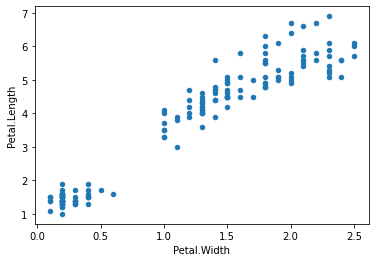

In [461]:
iris_df.plot(x = "Petal.Width", y="Petal.Length",kind="scatter")

<AxesSubplot:xlabel='Sepal.Width', ylabel='Sepal.Length'>

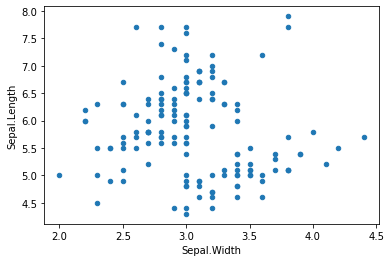

In [462]:
iris_df.plot(x = "Sepal.Width", y="Sepal.Length",kind="scatter")